In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os

In [6]:
from tqdm import tqdm

In [1]:
import cv2

In [31]:
DATADIR = "./PetImages"

In [32]:
CATEGORIES = ["Dog", "Cat"]

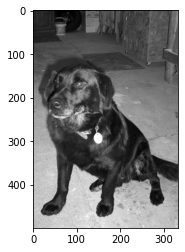

In [11]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array =cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        
        break
    break
        
        

In [12]:
print(img_array)

[[ 41  42  43 ... 123 138 135]
 [ 39  40  41 ... 133 143 136]
 [ 40  41  41 ... 139 145 135]
 ...
 [207 194 213 ... 207 198 188]
 [203 190 212 ... 202 191 184]
 [172 168 204 ... 195 182 179]]


In [13]:
print(img_array.shape)

(500, 333)


In [22]:
IMG_SIZE=100

In [23]:
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))

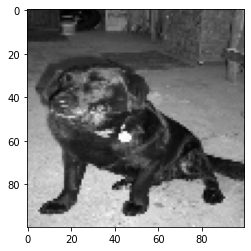

In [24]:
plt.imshow(new_array,cmap='gray')
plt.show()

In [26]:
print(new_array.shape)

(100, 100)


In [43]:
training_data=[]

In [48]:
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            

In [49]:
create_training_data()

100%|██████████| 12487/12487 [00:09<00:00, 1347.56it/s]


In [50]:
print(len(training_data))

24916


In [51]:
import random

In [53]:
random.shuffle(training_data)

In [54]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
1
0
0
0
0


In [55]:
X=[]
y=[]
for features,label in training_data:
    X.append(features)
    y.append(label)

In [57]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [58]:
import pickle

In [59]:
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close

<function BufferedWriter.close>